Bernardino Payan ID: 9000684321 Email: b.payan8432@student.nu.edu

Micro Project 1

In [4]:
pwd

'/Users/bernardinopayan'

In [5]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [6]:
# Working directory:
DATA = Path('.')

In [7]:
# load the data
stroke_df = pd.read_csv(DATA / 'healthcare-dataset-stroke-data.csv')
# review first seven records
stroke_df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [8]:
# Data information
# Display the number of data points and their data types
print("\nData Types and Non-Null Counts:")
print(stroke_df.info())


Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [9]:
# data dimension
stroke_df.shape

(5110, 12)

In [10]:
# Check for missing values in the entire DataFrame
missing_values = stroke_df.isnull().sum()

print("\nMissing Values:\n", missing_values)


Missing Values:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [11]:
# Fill missing bmi values with the median
median_bmi = stroke_df['bmi'].median()
stroke_df['bmi'].fillna(median_bmi, inplace=True)

print(stroke_df.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [12]:
# variable dat types
stroke_df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [13]:
print(stroke_df.describe())

                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  5110.000000  5110.000000  
mean          106.147677    28.862035     0.048728  
std            45.283560     7.699562     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.800000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    32.800000     0

In [14]:
# Calculate the minimum age
min_age = stroke_df['age'].min()
print(f"Minimum Age: {min_age}")

# Calculate the maximum age
max_age = stroke_df['age'].max()
print(f"Maximum Age: {max_age}")

Minimum Age: 0.08
Maximum Age: 82.0


In [15]:
# Count the number of people under the age of 18
under_18_count = stroke_df[stroke_df['age'] < 18].shape[0]

print(f"Number of people under the age of 18: {under_18_count}")

Number of people under the age of 18: 856


In [16]:
# Remove individuals under the age of 18
stroke_df_filtered = stroke_df[stroke_df['age'] >= 18]

# Check the new number of records
print("New total count after filtering out those under 18:", stroke_df_filtered.shape[0])

New total count after filtering out those under 18: 4254


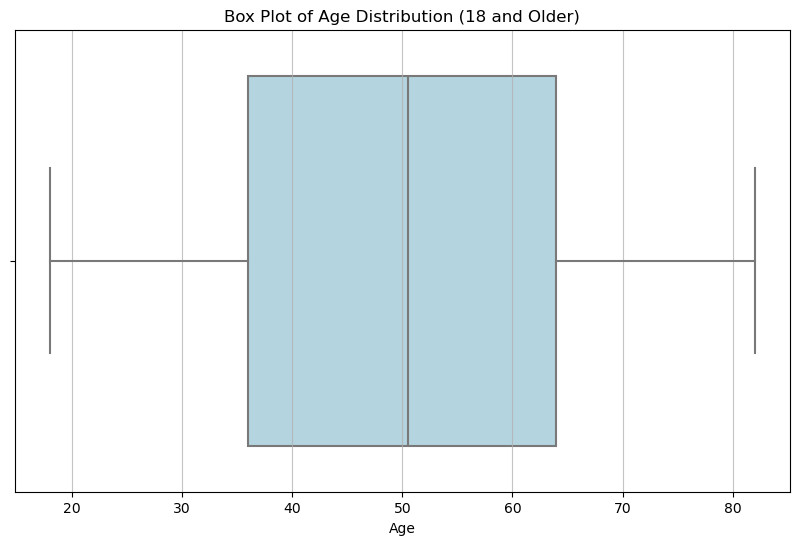

In [17]:
# Create a box plot for age
plt.figure(figsize=(10, 6))
sns.boxplot(x=stroke_df_filtered['age'], color='lightblue')
plt.title('Box Plot of Age Distribution (18 and Older)')
plt.xlabel('Age')
plt.grid(axis='x', alpha=0.75)
plt.show()

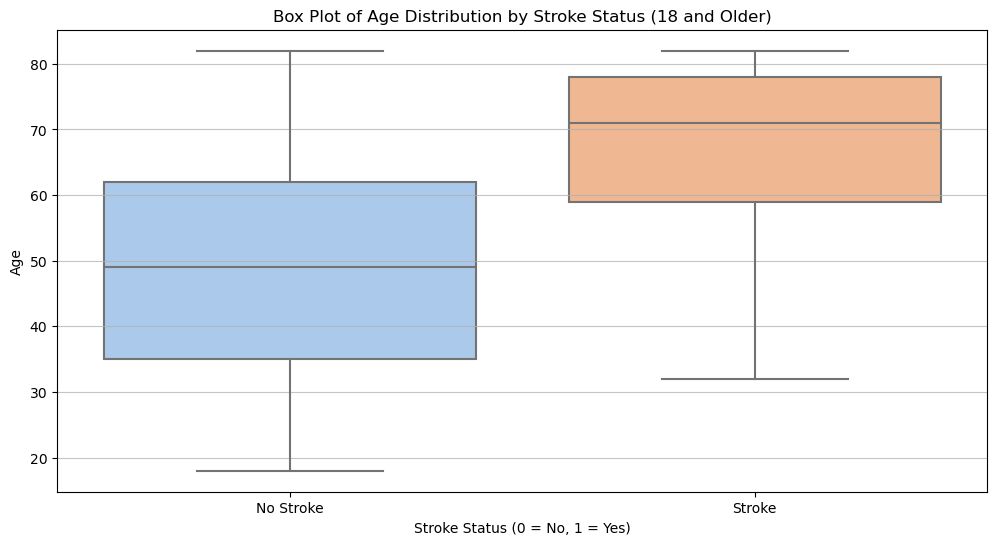

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


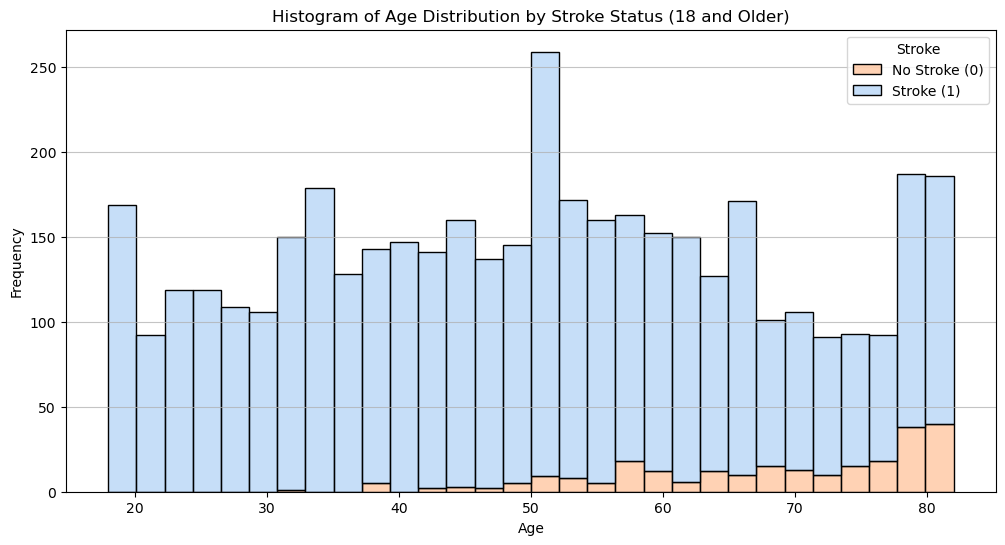

In [18]:
# Step 1: Create a box plot for age based on stroke status
plt.figure(figsize=(12, 6))
sns.boxplot(x='stroke', y='age', data=stroke_df_filtered, palette='pastel')
plt.title('Box Plot of Age Distribution by Stroke Status (18 and Older)')
plt.xlabel('Stroke Status (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=["No Stroke", "Stroke"])
plt.grid(axis='y', alpha=0.75)
plt.show()

# Step 2: Create a histogram for age based on stroke status
plt.figure(figsize=(12, 6))
sns.histplot(data=stroke_df_filtered, x='age', hue='stroke', multiple='stack', bins=30, palette='pastel', alpha=0.6)
plt.title('Histogram of Age Distribution by Stroke Status (18 and Older)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Stroke', labels=["No Stroke (0)", "Stroke (1)"], loc='upper right')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [19]:
# Get the number of features (columns)
num_features = stroke_df_filtered.shape[1]
print(f"Number of features (columns): {num_features}")

# Display information about the DataFrame
print("\nData Types and Non-Null Counts:")
stroke_df.info()

# Descriptive statistics for numerical features
print("\nDescriptive Statistics for Numerical Features:")
print(stroke_df.describe())

Number of features (columns): 12

Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

Descriptive Statistics for Numerical Features:
                 id          age  hypertens

In [20]:
# Unique values for categorical variables
print("Gender Distribution:")
print(stroke_df['gender'].value_counts())

print("\nEver Married Distribution:")
print(stroke_df['ever_married'].value_counts())

print("\nWork Type Distribution:")
print(stroke_df['work_type'].value_counts())

print("\nResidence Type Distribution:")
print(stroke_df['Residence_type'].value_counts())

print("\nSmoking Status Distribution:")
print(stroke_df['smoking_status'].value_counts())

Gender Distribution:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Ever Married Distribution:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Work Type Distribution:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Residence Type Distribution:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Smoking Status Distribution:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [21]:
# Define the bins for glucose levels
bins = [0, 70, 100, 125, 200, float('inf')]  # 'inf' to capture any value greater than 200
labels = ['Low (<70)', 'Normal (70-100)', 'Pre-diabetes (101-125)', 'Diabetes (126>)', 'High (>200)']

# Create a new column for glucose categories
stroke_df_filtered['glucose_category'] = pd.cut(stroke_df['avg_glucose_level'], bins=bins, labels=labels, right=False)

# Review the updated DataFrame
print(stroke_df_filtered[['avg_glucose_level', 'glucose_category']].head(10))

   avg_glucose_level        glucose_category
0             228.69             High (>200)
1             202.21             High (>200)
2             105.92  Pre-diabetes (101-125)
3             171.23         Diabetes (126>)
4             174.12         Diabetes (126>)
5             186.21         Diabetes (126>)
6              70.09         Normal (70-100)
7              94.39         Normal (70-100)
8              76.15         Normal (70-100)
9              58.57               Low (<70)


/var/folders/8m/vjpstzn520qg9bgfc17m3nh80000gn/T/ipykernel_57367/3750063574.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stroke_df_filtered['glucose_category'] = pd.cut(stroke_df['avg_glucose_level'], bins=bins, labels=labels, right=False)


In [22]:
#EDA
#Count the number of people with and without strokes
stroke_counts = stroke_df_filtered['stroke'].value_counts()

print("Stroke Counts in Filtered Data:")
print(stroke_counts)



Stroke Counts in Filtered Data:
stroke
0    4007
1     247
Name: count, dtype: int64


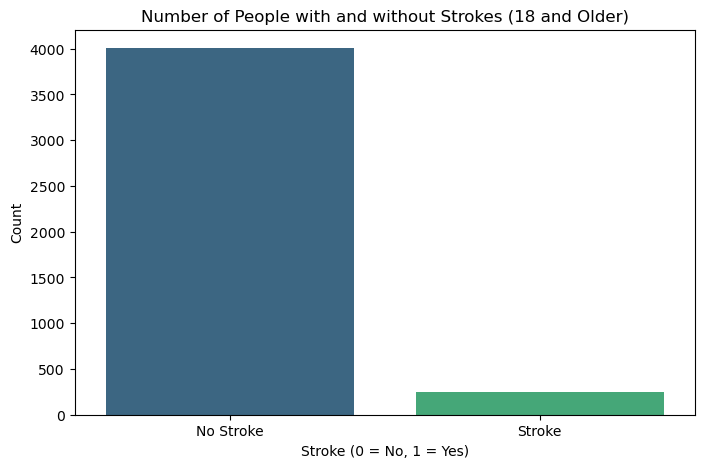

In [23]:
# Plotting the counts of people with and without strokes in the filtered dataset
plt.figure(figsize=(8, 5))
sns.countplot(data=stroke_df_filtered, x='stroke', palette='viridis')
plt.title("Number of People with and without Strokes (18 and Older)")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No Stroke", "Stroke"])
plt.show()

In [24]:
#Gender
gender_counts = stroke_df_filtered['gender'].value_counts()

print("Counts of Gender:")
print(gender_counts)

Counts of Gender:
gender
Female    2576
Male      1677
Other        1
Name: count, dtype: int64


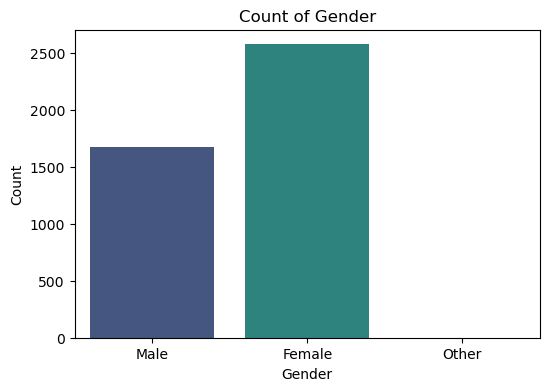

In [25]:
# Plotting the gender counts
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=stroke_df_filtered, palette='viridis')
plt.title('Count of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [26]:
# Count the number of people with and without strokes for each gender
gender_stroke_counts = stroke_df_filtered.groupby(['gender', 'stroke']).size().unstack(fill_value=0)

print("Stroke Counts by Gender:")
print(gender_stroke_counts)

Stroke Counts by Gender:
stroke     0    1
gender           
Female  2437  139
Male    1569  108
Other      1    0


<Figure size 800x500 with 0 Axes>

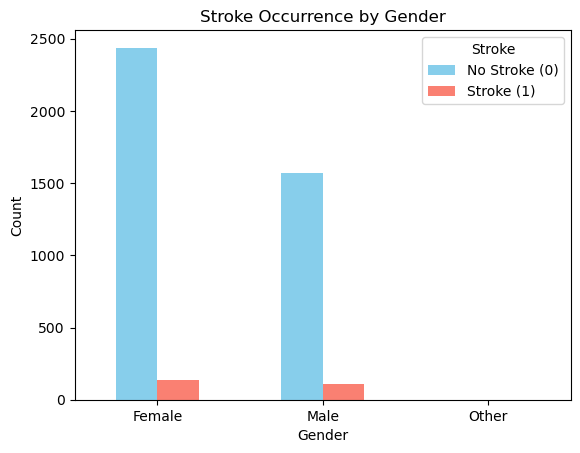

In [27]:
# Plotting the bar graph
plt.figure(figsize=(8, 5))
gender_stroke_counts.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])
plt.title('Stroke Occurrence by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Stroke', labels=["No Stroke (0)", "Stroke (1)"])
plt.show()

In [28]:
# Count the occurrences of hypertension
hypertension_counts = stroke_df_filtered['hypertension'].value_counts()

print("Counts of Hypertension:")
print(hypertension_counts)

Counts of Hypertension:
hypertension
0    3757
1     497
Name: count, dtype: int64


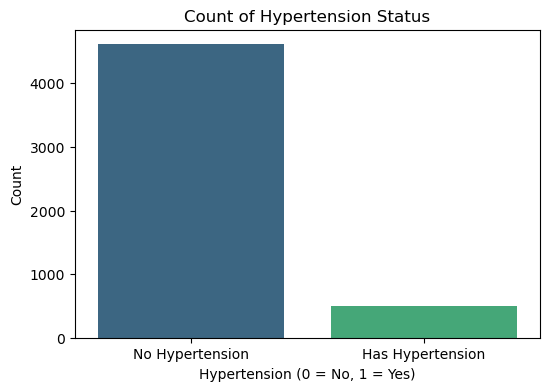

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the hypertension counts
plt.figure(figsize=(6, 4))
sns.countplot(x='hypertension', data=stroke_df, palette='viridis')
plt.title('Count of Hypertension Status')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=["No Hypertension", "Has Hypertension"])  # Customize x-tick labels
plt.show()

In [30]:
# Count the number of people with hypertension and their stroke status
hypertension_stroke_counts = stroke_df_filtered.groupby(['hypertension', 'stroke']).size().unstack(fill_value=0)

print("Counts of Hypertension and Stroke Status:")
print(hypertension_stroke_counts)

Counts of Hypertension and Stroke Status:
stroke           0    1
hypertension           
0             3576  181
1              431   66


AttributeError: 'numpy.int64' object has no attribute 'startswith'

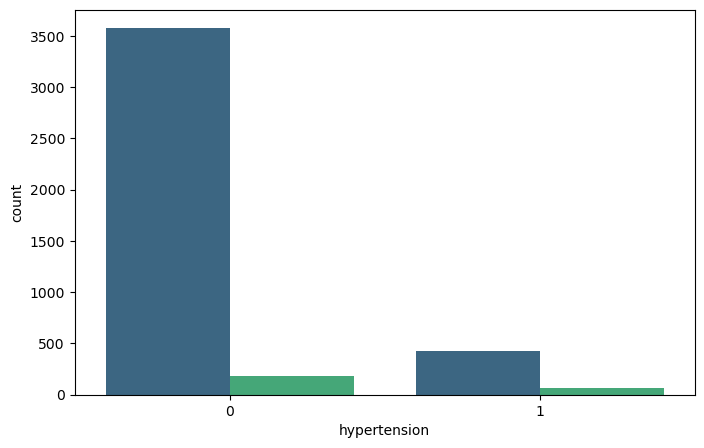

In [31]:
# Plotting hypertension and stroke occurrence
plt.figure(figsize=(8, 5))
sns.countplot(data=stroke_df_filtered, x='hypertension', hue='stroke', palette='viridis')
plt.title('Stroke Occurrences Based on Hypertension Status')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=["No Stroke (0)", "Stroke (1)"], loc='upper right')
plt.xticks(ticks=[0, 1], labels=["No Hypertension", "Has Hypertension"])  # Custom x-ticks
plt.show()

In [ ]:
# Count the occurrences of each smoking status
smoking_counts = stroke_df_filtered['smoking_status'].value_counts()

print("Counts of Smoking Status:")
print(smoking_counts)

In [ ]:
# Plotting the smoking status counts
plt.figure(figsize=(8, 5))
sns.countplot(x='smoking_status', data=stroke_df_filtered, palette='viridis')
plt.title('Count of Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-tick labels for better readability
plt.show()

In [ ]:
# Count the occurrences of smoking status and stroke
smoking_stroke_counts = stroke_df_filtered.groupby(['smoking_status', 'stroke']).size().unstack(fill_value=0)

print("Counts of Smoking Status and Stroke Status:")
print(smoking_stroke_counts)

In [ ]:
# Plotting the smoking status and stroke occurrence
plt.figure(figsize=(10, 6))
sns.countplot(data=stroke_df, x='smoking_status', hue='stroke', palette='viridis')
plt.title('Stroke Occurrences Based on Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=["No Stroke (0)", "Stroke (1)"], loc='upper right')
plt.xticks(rotation=45)  # Rotate x-tick labels for better readability
plt.show()

In [ ]:
# Count occurrences of each glucose category
glucose_category_counts = stroke_df_filtered['glucose_category'].value_counts()

print("\nCounts of Average Glucose Levels by Category:")
print(glucose_category_counts)

In [32]:
# Count the number of people with and without strokes for each glucose category
glucose_stroke_counts = stroke_df_filtered.groupby(['glucose_category', 'stroke']).size().unstack(fill_value=0)

print("Counts of Stroke Occurrences by Glucose Level Category:")
print(glucose_stroke_counts)

Counts of Stroke Occurrences by Glucose Level Category:
stroke                     0   1
glucose_category                
Low (<70)                585  26
Normal (70-100)         1868  84
Pre-diabetes (101-125)   747  37
Diabetes (126>)          436  44
High (>200)              371  56


/var/folders/8m/vjpstzn520qg9bgfc17m3nh80000gn/T/ipykernel_57367/2978354668.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  glucose_stroke_counts = stroke_df_filtered.groupby(['glucose_category', 'stroke']).size().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

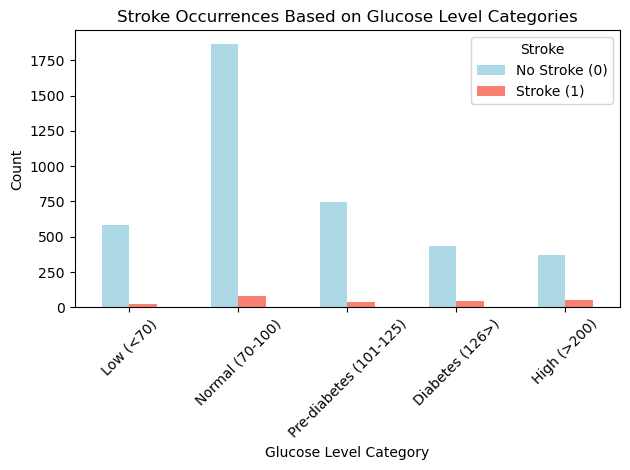

In [33]:
# Plotting the glucose levels by stroke occurrence
plt.figure(figsize=(10, 6))
glucose_stroke_counts.plot(kind='bar', stacked=False, color=['lightblue', 'salmon'])
plt.title('Stroke Occurrences Based on Glucose Level Categories')
plt.xlabel('Glucose Level Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Stroke', labels=["No Stroke (0)", "Stroke (1)"])
plt.tight_layout()  # Adjust layout
plt.show()

In [41]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [42]:
# Data information
# Display the number of data points and their data types
print("\nData Types and Non-Null Counts:")
print(stroke_df_filtered.info())


Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
Index: 4254 entries, 0 to 5109
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 4254 non-null   int64   
 1   gender             4254 non-null   object  
 2   age                4254 non-null   float64 
 3   hypertension       4254 non-null   int64   
 4   heart_disease      4254 non-null   int64   
 5   ever_married       4254 non-null   object  
 6   work_type          4254 non-null   object  
 7   Residence_type     4254 non-null   object  
 8   avg_glucose_level  4254 non-null   float64 
 9   bmi                4254 non-null   float64 
 10  smoking_status     4254 non-null   object  
 11  stroke             4254 non-null   int64   
 12  glucose_category   4254 non-null   category
dtypes: category(1), float64(3), int64(4), object(5)
memory usage: 436.4+ KB
None


In [60]:
# Define the mappings for categorical variables
gender_mapping = {'Male': 1, 'Female': 2, 'Other': 3}
ever_married_mapping = {'Yes': 1, 'No': 2}
work_type_mapping = {
    'Govt_job': 1, 
    'Never_worked': 2, 
    'Private': 3, 
    'Self-employed': 4,
    'children': 5  # Including children in mappings if it's present
}
Residence_type_mapping = {'Rural': 1, 'Urban': 2}
smoking_status_mapping = {
    'formerly smoked': 1, 
    'never smoked': 2, 
    'smokes': 3, 
    'unknown': 4
}

# Glucose category mapping
glucose_mapping = {
    'Low (<70)': 1,
    'Normal (70-100)': 2,
    'Pre-diabetes (101-125)': 3,
    'Diabetes (126>)': 4,
    'High (>200)': 5
}

# Apply the mappings to the DataFrame using .loc to avoid SettingWithCopyWarning
stroke_df_filtered.loc[:, 'gender'] = stroke_df_filtered['gender'].replace(gender_mapping)
stroke_df_filtered.loc[:, 'ever_married'] = stroke_df_filtered['ever_married'].replace(ever_married_mapping)

# Check if 'residence_type' is in the DataFrame
if 'Residence_type' in stroke_df_filtered.columns:
    stroke_df_filtered.loc[:, 'Residence_type'] = stroke_df_filtered['Residence_type'].replace(Residence_type_mapping)
else:
    print("'Residence_type' column not found.")

stroke_df_filtered.loc[:, 'smoking_status'] = stroke_df_filtered['smoking_status'].replace(smoking_status_mapping)

# Convert glucose_category to numerical values
if 'glucose_category' in stroke_df_filtered.columns:
    stroke_df_filtered.loc[:, 'glucose_category'] = stroke_df_filtered['glucose_category'].replace(glucose_mapping)
else:
    print("'glucose_category' column not found.")

# Check the updated DataFrame
print(stroke_df_filtered.head())

      id  gender   age  hypertension  heart_disease  ever_married  work_type  \
0   9046       1  67.0             0              1             1          3   
1  51676       2  61.0             0              0             1          4   
2  31112       1  80.0             0              1             1          3   
3  60182       2  49.0             0              0             1          3   
4   1665       2  79.0             1              0             1          4   

  Residence_type  avg_glucose_level   bmi smoking_status  stroke  \
0              2             228.69  36.6              1       1   
1              1             202.21  28.1              2       1   
2              1             105.92  32.5              2       1   
3              2             171.23  34.4              3       1   
4              1             174.12  24.0              2       1   

  glucose_category  
0                5  
1                5  
2                3  
3                4  
4    

In [55]:
# Check data types to identify any non-numeric columns
print(stroke_df_filtered.dtypes)

id                      int64
gender                  int64
age                   float64
hypertension            int64
heart_disease           int64
ever_married            int64
work_type               int64
Residence_type         object
avg_glucose_level     float64
bmi                   float64
smoking_status         object
stroke                  int64
glucose_category     category
dtype: object


In [64]:
# Check the columns in the stroke_df_encoded DataFrame
print("Current columns in stroke_df_filtered:")
print(stroke_df_filtered.columns)

Current columns in stroke_df_filtered:
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'glucose_category'],
      dtype='object')


In [65]:
# Step 1: Encode the categorical variables
# One-hot encode for Residence_type and smoking_status
stroke_df_encoded = pd.get_dummies(stroke_df_filtered, columns=['Residence_type', 'smoking_status'], drop_first=True)

# Step 2: Check the new DataFrame structure
print(stroke_df_encoded.info())

# Step 3: Separate features (X) and target variable (y)
X = stroke_df_encoded.drop('stroke', axis=1)  # Features
y = stroke_df_encoded['stroke']  # Target variable

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Step 4: Apply SMOTE to the features and target
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine the resampled features and target back into a single DataFrame
stroke_df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
stroke_df_balanced['stroke'] = y_resampled

# Step 5: Check the new class counts to verify balance
print("New class counts after SMOTE:")
print(stroke_df_balanced['stroke'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 4254 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   id                      4254 non-null   int64   
 1   gender                  4254 non-null   int64   
 2   age                     4254 non-null   float64 
 3   hypertension            4254 non-null   int64   
 4   heart_disease           4254 non-null   int64   
 5   ever_married            4254 non-null   int64   
 6   work_type               4254 non-null   int64   
 7   avg_glucose_level       4254 non-null   float64 
 8   bmi                     4254 non-null   float64 
 9   stroke                  4254 non-null   int64   
 10  glucose_category        4254 non-null   category
 11  Residence_type_2        4254 non-null   bool    
 12  smoking_status_2        4254 non-null   bool    
 13  smoking_status_3        4254 non-null   bool    
 14  smoking_status_Unknown  4254 

In [66]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = stroke_df_balanced.drop('stroke', axis=1)  # Features
y = stroke_df_balanced['stroke']  # Target variable

# Split the resampled data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

print("Training set class distribution:")
print(y_train.value_counts())

print("\nTesting set class distribution:")
print(y_test.value_counts())

Training set shape: (6411, 14)
Testing set shape: (1603, 14)
Training target shape: (6411,)
Testing target shape: (1603,)
Training set class distribution:
stroke
1    3207
0    3204
Name: count, dtype: int64

Testing set class distribution:
stroke
0    803
1    800
Name: count, dtype: int64


In [70]:
from sklearn.preprocessing import StandardScaler

#Scale the Features

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (DO NOT fit the scaler on the test data)
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the scaled data
print("Scaled Training set shape:", X_train_scaled.shape)
print("Scaled Testing set shape:", X_test_scaled.shape)

Scaled Training set shape: (6411, 14)
Scaled Testing set shape: (1603, 14)


In [73]:
print(stroke_df_balanced.isnull().sum())

id                           0
gender                       0
age                          0
hypertension                 0
heart_disease                0
ever_married                 0
work_type                    0
avg_glucose_level            0
bmi                          0
glucose_category          2814
Residence_type_2             0
smoking_status_2             0
smoking_status_3             0
smoking_status_Unknown       0
stroke                       0
dtype: int64


In [74]:
from sklearn.impute import SimpleImputer

# Create an imputer that fills NaN with the median of the column
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the training data and transform it
X_imputed = imputer.fit_transform(X_train)

Missing values in dataset:
id                           0
gender                       0
age                          0
hypertension                 0
heart_disease                0
ever_married                 0
work_type                    0
avg_glucose_level            0
bmi                          0
glucose_category          2814
Residence_type_2             0
smoking_status_2             0
smoking_status_3             0
smoking_status_Unknown       0
stroke                       0
dtype: int64
Decision Tree Classifier Results:
[[725  78]
 [ 69 731]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91       803
           1       0.90      0.91      0.91       800

    accuracy                           0.91      1603
   macro avg       0.91      0.91      0.91      1603
weighted avg       0.91      0.91      0.91      1603



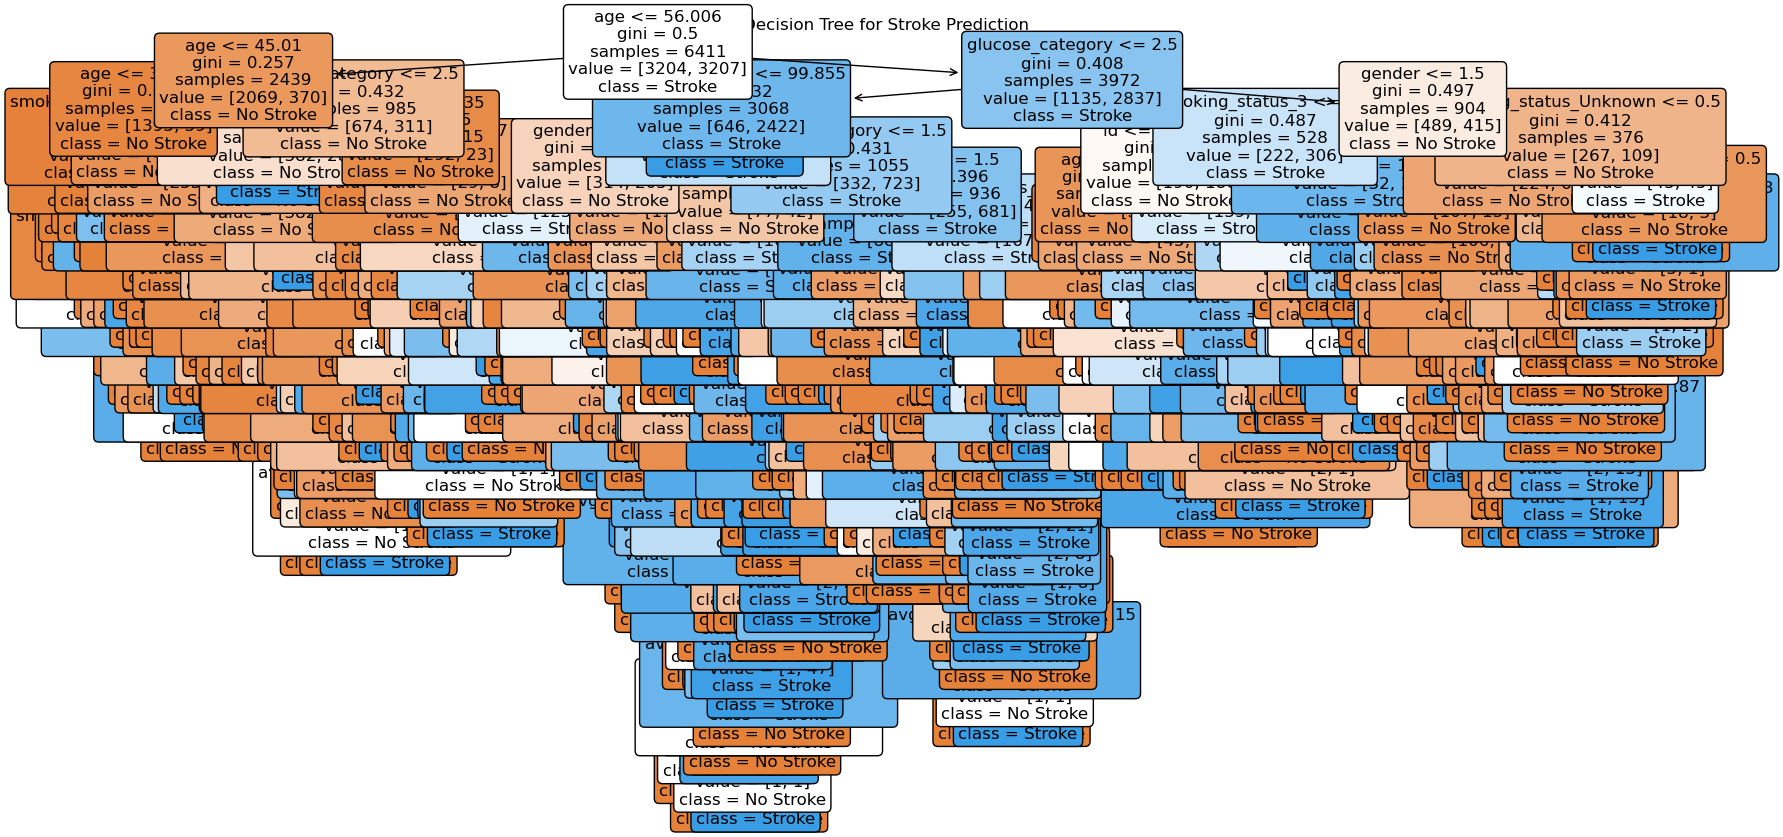

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Check for missing values
print("Missing values in dataset:")
print(stroke_df_balanced.isnull().sum())

# Fill missing values with the median for example
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(stroke_df_balanced.drop('stroke', axis=1))

# Create target variable
y = stroke_df_balanced['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Initialize and fit the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Evaluate the Decision Tree
print("Decision Tree Classifier Results:")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Visualization of the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, 
          filled=True, 
          feature_names=stroke_df_balanced.columns[:-1],  # Exclude the target variable
          class_names=['No Stroke', 'Stroke'],  # Assuming the target is binary
          rounded=True, 
          fontsize=12)

plt.title('Decision Tree for Stroke Prediction')
plt.show()

In [81]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Check for missing values
print("Missing values in dataset:")
print(stroke_df_balanced.isnull().sum())

# Handle missing values - Example using SimpleImputer for median imputation
imputer = SimpleImputer(strategy='median')
stroke_df_balanced_imputed = pd.DataFrame(imputer.fit_transform(stroke_df_balanced.drop('stroke', axis=1)), columns=stroke_df_balanced.columns[:-1])

# Create target variable
y = stroke_df_balanced['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(stroke_df_balanced_imputed, y, test_size=0.2, random_state=42)

# Scale the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Logistic Regression Model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate Logistic Regression
print("Logistic Regression Results:")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Missing values in dataset:
id                           0
gender                       0
age                          0
hypertension                 0
heart_disease                0
ever_married                 0
work_type                    0
avg_glucose_level            0
bmi                          0
glucose_category          2814
Residence_type_2             0
smoking_status_2             0
smoking_status_3             0
smoking_status_Unknown       0
stroke                       0
dtype: int64
Logistic Regression Results:
[[696 107]
 [110 690]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       803
           1       0.87      0.86      0.86       800

    accuracy                           0.86      1603
   macro avg       0.86      0.86      0.86      1603
weighted avg       0.86      0.86      0.86      1603



In [86]:
from sklearn.svm import SVC

# Train a Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42, probability=True)  # You can choose different kernels
svm_model.fit(X_train_scaled, y_train)

# Step 5: Predict on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Step 6: Evaluate the SVM model
print("Support Vector Machine Results:")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Support Vector Machine Results:
[[702 101]
 [108 692]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       803
           1       0.87      0.86      0.87       800

    accuracy                           0.87      1603
   macro avg       0.87      0.87      0.87      1603
weighted avg       0.87      0.87      0.87      1603



In [87]:
# Calculate confusion matrices for each model
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Function to calculate accuracy from confusion matrix
def calculate_accuracy(cm):
    TN, FP, FN, TP = cm.ravel()  # Unpack the confusion matrix
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return accuracy

# Calculate accuracies
accuracy_dt = calculate_accuracy(cm_dt)
accuracy_lr = calculate_accuracy(cm_lr)
accuracy_svm = calculate_accuracy(cm_svm)

print(f"Decision Tree Accuracy: {accuracy_dt:.2f}")
print(f"Logistic Regression Accuracy: {accuracy_lr:.2f}")
print(f"SVM Accuracy: {accuracy_svm:.2f}")

Decision Tree Accuracy: 0.91
Logistic Regression Accuracy: 0.86
SVM Accuracy: 0.87


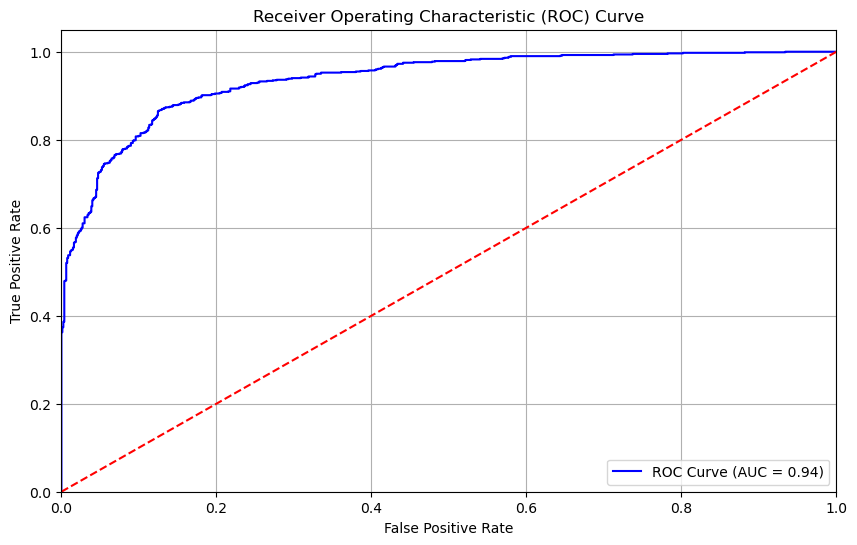

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train a Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', random_state=42, probability=True)  # Enable probability estimates
svm_model.fit(X_train_scaled, y_train)

# Get predicted probabilities for the positive class
y_scores_svm = svm_model.predict_proba(X_test_scaled)[:, 1]  # Probability of the positive class

# Calculate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_scores_svm)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()